
# Week 4 – Numerical Methods for Aerospace
### Focus: ODE Solvers & Optimization

In this week, we’ll learn:
- Why numerical methods matter in aerospace
- How to solve differential equations using Python (`scipy.integrate`)
- How to optimize functions for engineering design


In [1]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize



## ✈️ Example 1: Aircraft Climb – ODE Solver

We’ll model an aircraft climbing with a simple ODE:

\[
\frac{dh}{dt} = V \cdot \sin(\theta)
\]

Where:  
- `h(t)` = altitude (m)  
- `V` = velocity (m/s)  
- `θ` = climb angle (rad)  


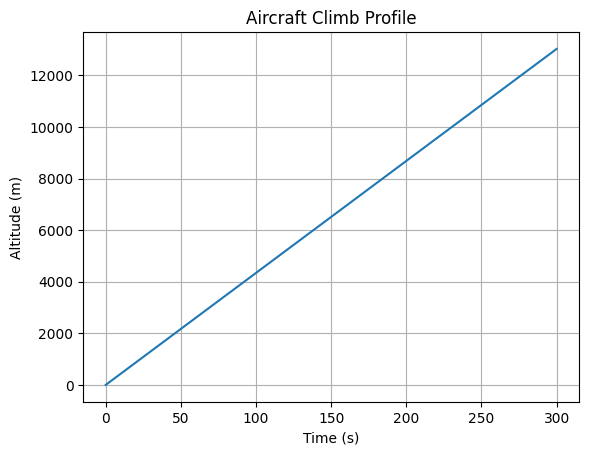

In [2]:

# Parameters
V = 250   # m/s (approx 900 km/h)
theta = np.deg2rad(10)  # 10° climb

def climb_rate(t, h):
    return V * np.sin(theta)

# Solve ODE for 0–300 seconds
sol = solve_ivp(climb_rate, [0, 300], [0], t_eval=np.linspace(0, 300, 100))

# Plot altitude vs time
plt.plot(sol.t, sol.y[0])
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.title("Aircraft Climb Profile")
plt.grid(True)
plt.show()



## 🌪 Example 2: Optimization – Wing Design Problem

We want to minimize drag \( D = C_d \cdot \frac{1}{2} \rho V^2 S \)  
while keeping lift ≥ required lift.

Here we use **SciPy minimize**.


In [3]:

rho = 1.225  # air density (kg/m^3)
V = 70       # m/s
W = 6000*9.81  # aircraft weight (N)

def drag(x):
    S, CL = x
    CD = 0.02 + 0.04 * CL**2  # drag polar
    return 0.5 * rho * V**2 * S * CD

def lift_constraint(x):
    S, CL = x
    L = 0.5 * rho * V**2 * S * CL
    return L - W

cons = ({'type': 'ineq', 'fun': lift_constraint})
x0 = [30, 0.5]  # initial guess (wing area, CL)

result = minimize(drag, x0, constraints=cons)

print("Optimal Wing Area (S):", result.x[0], "m^2")
print("Optimal Lift Coefficient (CL):", result.x[1])
print("Minimum Drag:", result.fun, "N")


Optimal Wing Area (S): 27.73531644000809 m^2
Optimal Lift Coefficient (CL): 0.707106711655448
Minimum Drag: 3329.624411214914 N



## ✅ Summary
- Used `solve_ivp` to simulate aircraft climb (ODE solver)
- Used `minimize` to optimize wing design
- Learned how **numerical methods are crucial** for stability, performance, and efficiency in aerospace

➡️ Next Week (Week 5): **CFD Basics in Python**
